In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi
sns.set(style='whitegrid')

In [20]:
# Cargar datos desde GitHub
url = "https://raw.githubusercontent.com/ClaudixoPG/ESI_2025_S1/main/datasets/guess_proyecto3_datos.xlsx"
df = pd.read_excel(url, skiprows=10)
df.head()

,user_id,version,AE1,AE2,AE3,AE4,PE1,PE2,PE3,PE4,...,US2,US3,US4,US5,US6,US7,VA1,VA2,VA3,VA4
0,user_1,v1,5,5,4,3,4,5,5,5,...,4,4,5,6,3,6,4,5,5,4
1,user_2,v1,5,7,4,4,5,5,4,5,...,4,3,4,3,5,4,4,5,3,4
2,user_3,v1,6,5,4,4,6,5,5,5,...,7,5,4,5,5,3,2,5,5,5
3,user_4,v1,5,4,5,6,5,6,4,4,...,6,6,5,3,5,3,6,4,4,4
4,user_5,v1,5,4,3,5,4,4,5,5,...,3,3,5,5,4,4,4,4,5,5


In [21]:
subescalas = {
    "Aesthetics": ["AE1", "AE2", "AE3", "AE4"],
    "Play Engrossment": ["PE1", "PE2", "PE3", "PE4", "PE5", "PE6", "PE7"],
    "Enjoyment": ["EN1", "EN2", "EN3", "EN4", "EN5", "EN6"],
    "Personal Gratification": ["PG1", "PG2", "PG3", "PG4"],
    "Creative Freedom": ["CF1", "CF2", "CF3", "CF4"],
    "Social Connectivity": ["SC1", "SC2", "SC3", "SC4", "SC5"],
    "Narrative": ["NA1", "NA2", "NA3", "NA4"],
    "Usability/Playability": ["US1", "US2", "US3", "US4", "US5", "US6", "US7"],
    "Visual Aesthetics": ["VA1", "VA2", "VA3", "VA4"]
}

In [22]:
# Crear un nuevo DataFrame con solo user_id y version
df_sub = df[['user_id', 'version']].copy()

# Agregar el promedio por subescala
for nombre, columnas in subescalas.items():
    df_sub[nombre] = df[columnas].mean(axis=1)

df_sub.head()

,user_id,version,Aesthetics,Play Engrossment,Enjoyment,Personal Gratification,Creative Freedom,Social Connectivity,Narrative,Usability/Playability,Visual Aesthetics
0,user_1,v1,4.25,4.857143,3.833333,4.25,5.25,4.0,4.00,4.571429,4.50
1,user_2,v1,5.00,4.714286,3.666667,4.00,4.75,4.2,3.50,4.000000,4.00
2,user_3,v1,4.75,5.142857,4.666667,4.50,4.25,4.8,4.25,4.571429,4.25
3,user_4,v1,5.00,4.714286,4.666667,5.25,5.00,4.6,4.75,4.714286,4.50
4,user_5,v1,4.25,4.428571,4.166667,4.25,5.00,4.8,4.50,4.000000,4.50


In [23]:
#v1 = df_sub[df_sub['version'] == 'v1'].sort_values('user_id')
#v2 = df_sub[df_sub['version'] == 'v2'].sort_values('user_id')

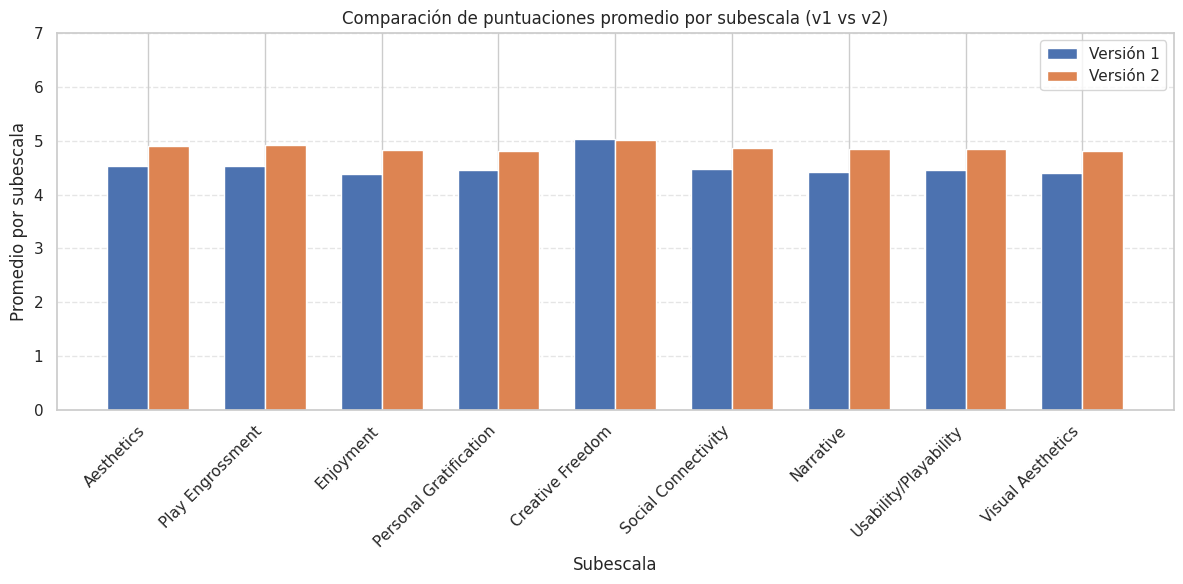

In [24]:

mean_scores = df_sub.groupby('version').mean(numeric_only=True).T  # Transponer para tener subescalas como filas
mean_scores = mean_scores.reset_index().rename(columns={'index': 'Subescala'})

# Crear el gráfico
plt.figure(figsize=(12, 6))
x = np.arange(len(mean_scores['Subescala']))
bar_width = 0.35

plt.bar(x - bar_width/2, mean_scores['v1'], width=bar_width, label='Versión 1')
plt.bar(x + bar_width/2, mean_scores['v2'], width=bar_width, label='Versión 2')

plt.xticks(x, mean_scores['Subescala'], rotation=45, ha='right')
plt.xlabel('Subescala')
plt.ylabel('Promedio por subescala')
plt.title('Comparación de puntuaciones promedio por subescala (v1 vs v2)')
plt.ylim(0, 7)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

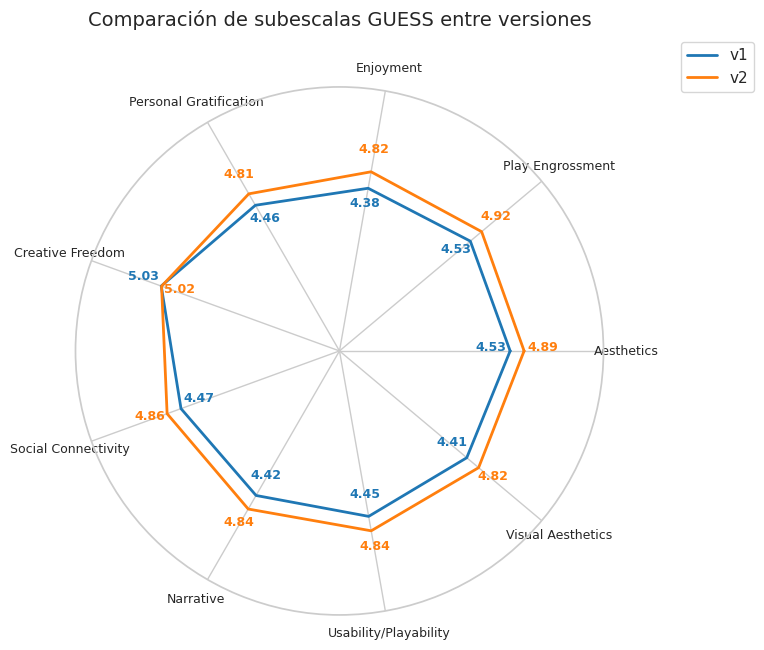

In [25]:
# Radar chart comparativo entre las versiones
# Calcular promedios por subescala y versión
mean_scores = df_sub.groupby('version').mean(numeric_only=True).reset_index()

# Labels y ángulos
labels = mean_scores.columns[1:].tolist()
angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]

# Crear figura
plt.figure(figsize=(8, 8))

# Colores por versión
colores = ['#1f77b4', '#ff7f0e']

# Convertir mean_scores a dicts por versión
v1_vals = mean_scores[mean_scores['version'] == 'v1'].iloc[0, 1:].tolist()
v2_vals = mean_scores[mean_scores['version'] == 'v2'].iloc[0, 1:].tolist()

# Cerrar círculo
v1_vals += v1_vals[:1]
v2_vals += v2_vals[:1]

# Dibujar líneas
plt.polar(angles, v1_vals, label='v1', linewidth=2, color=colores[0])
plt.polar(angles, v2_vals, label='v2', linewidth=2, color=colores[1])

# Mostrar valores con posición dinámica
for i, angle in enumerate(angles):
    if i < len(labels):  # evitar repetir el último
        v1_val = v1_vals[i]
        v2_val = v2_vals[i]
        if v1_val > v2_val:
            plt.text(angle, v1_val + 0.5, f'{v1_val:.2f}', color=colores[0], fontsize=9,
                     ha='center', fontweight='bold')
            plt.text(angle, v2_val - 0.5, f'{v2_val:.2f}', color=colores[1], fontsize=9,
                     ha='center', fontweight='bold')
        else:
            plt.text(angle, v1_val - 0.5, f'{v1_val:.2f}', color=colores[0], fontsize=9,
                     ha='center', fontweight='bold')
            plt.text(angle, v2_val + 0.5, f'{v2_val:.2f}', color=colores[1], fontsize=9,
                     ha='center', fontweight='bold')

# Estética
plt.xticks(angles[:-1], labels, fontsize=9)
plt.yticks([])
plt.ylim(0, 7)
plt.title('Comparación de subescalas GUESS entre versiones', size=14, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()



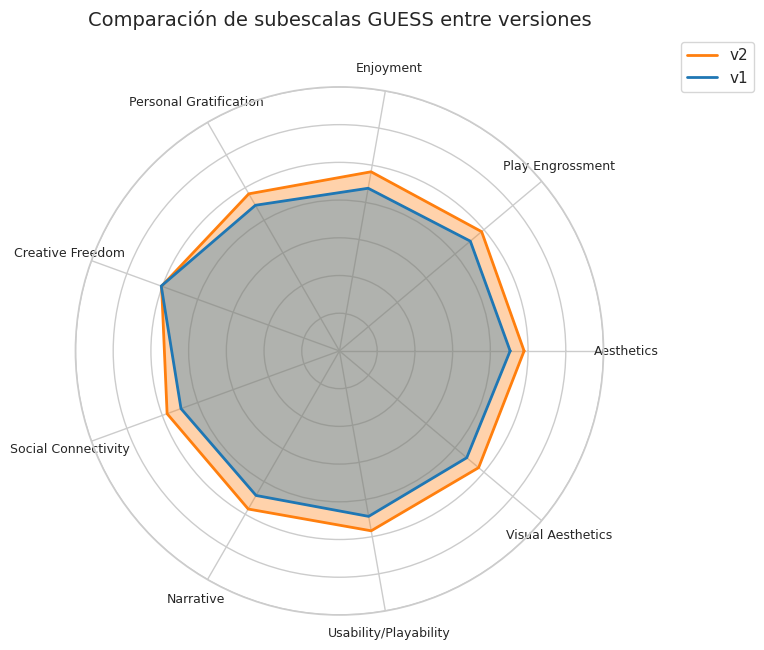

In [26]:
#Radar Relleno
# Calcular promedios por subescala y versión
mean_scores = df_sub.groupby('version').mean(numeric_only=True).reset_index()

# Asegurar que v2 se dibuje primero y luego v1 (para que v1 quede encima)
mean_scores = mean_scores.sort_values(by='version', ascending=False)  # Asume que v1 < v2 alfabéticamente

# Labels y ángulos
labels = mean_scores.columns[1:].tolist()
angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]

# Crear figura
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Colores por versión
colores = {'v1': '#1f77b4', 'v2': '#ff7f0e'}  # azul v1, naranjo v2

# Dibujar cada versión (v2 primero, luego v1)
for i, row in mean_scores.iterrows():
    version = row['version']
    stats = row[1:].tolist()
    stats += stats[:1]
    ax.plot(angles, stats, label=version, linewidth=2, color=colores[version])
    ax.fill(angles, stats, alpha=0.35, color=colores[version])

# Personalización
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)
ax.set_yticklabels([])
ax.set_ylim(0, 7)

ax.set_title('Comparación de subescalas GUESS entre versiones', size=14, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


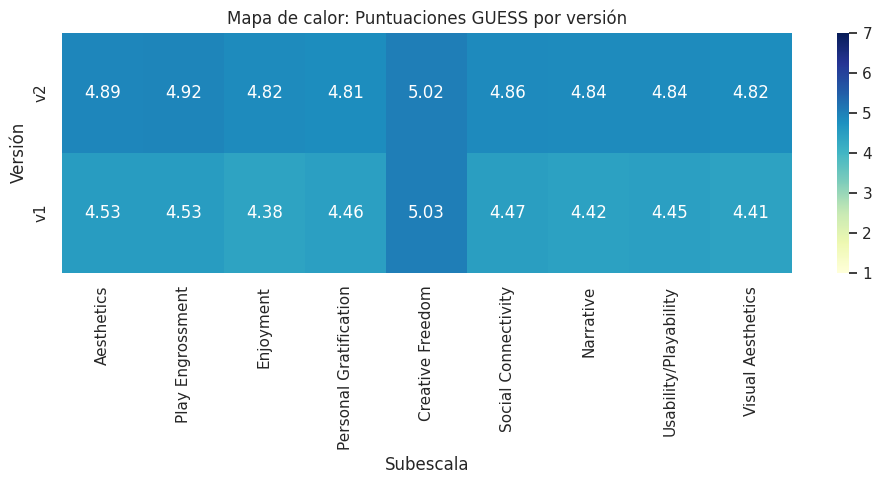

In [27]:
#Heatmap
plt.figure(figsize=(10, 5))

# Crear el heatmap con anotaciones y escala 1–7
sns.heatmap(mean_scores.set_index('version'),
            annot=True,
            cmap='YlGnBu',
            cbar=True,
            vmin=1, vmax=7,
            fmt=".2f")

# Personalizar etiquetas y título
plt.title('Mapa de calor: Puntuaciones GUESS por versión')
plt.xlabel('Subescala')
plt.ylabel('Versión')
plt.tight_layout()
plt.show()

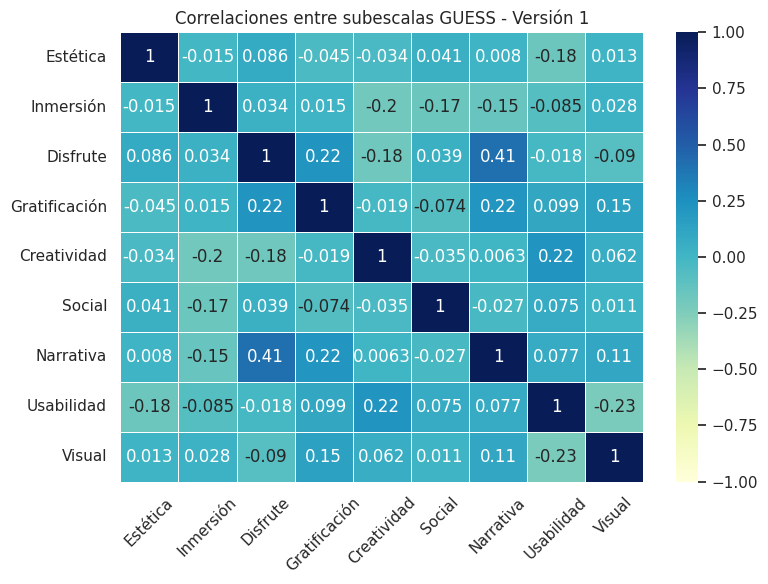

In [28]:
#Heatmap de correlacion
df_v1 = df_sub[df_sub['version'] == 'v1'].copy()

abreviaciones = {
    "Aesthetics": "Estética",
    "Creative Freedom": "Creatividad",
    "Enjoyment": "Disfrute",
    "Narrative": "Narrativa",
    "Personal Gratification": "Gratificación",
    "Play Engrossment": "Inmersión",
    "Social Connectivity": "Social",
    "Usability/Playability": "Usabilidad",
    "Visual Aesthetics": "Visual"
}
df_v1 = df_v1.rename(columns=abreviaciones)

# Calcular la matriz de correlación
corr = df_v1.drop(columns=['user_id', 'version']).corr()

# Graficar el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, linewidths=0.5)

# Personalización
plt.title('Correlaciones entre subescalas GUESS - Versión 1')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

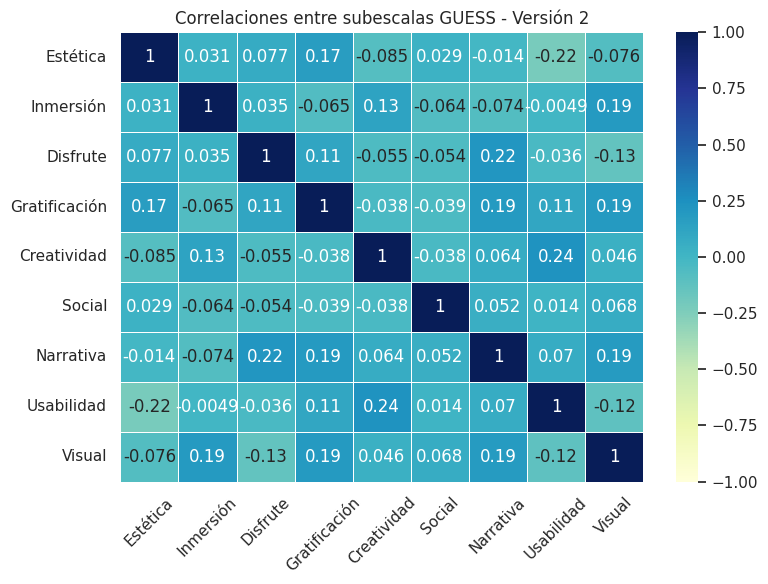

In [29]:
#Heatmap de correlacion
df_v1 = df_sub[df_sub['version'] == 'v2'].copy()

abreviaciones = {
    "Aesthetics": "Estética",
    "Creative Freedom": "Creatividad",
    "Enjoyment": "Disfrute",
    "Narrative": "Narrativa",
    "Personal Gratification": "Gratificación",
    "Play Engrossment": "Inmersión",
    "Social Connectivity": "Social",
    "Usability/Playability": "Usabilidad",
    "Visual Aesthetics": "Visual"
}
df_v1 = df_v1.rename(columns=abreviaciones)

# Calcular la matriz de correlación
corr = df_v1.drop(columns=['user_id', 'version']).corr()

# Graficar el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, linewidths=0.5)

# Personalización
plt.title('Correlaciones entre subescalas GUESS - Versión 2')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

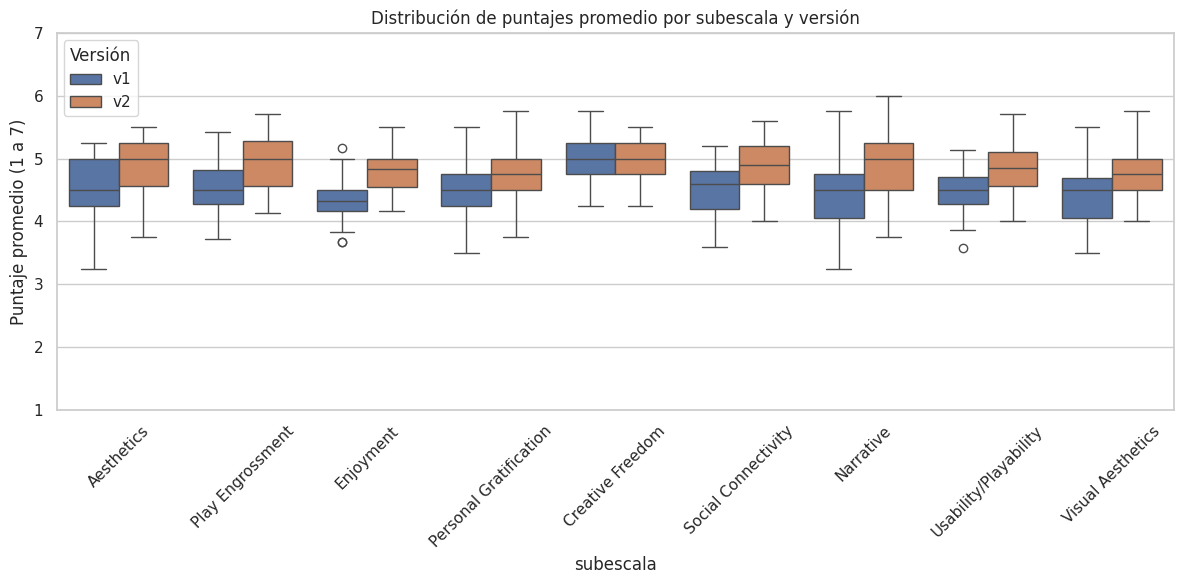

In [30]:
#Boxplot
# Derretir el DataFrame de promedios para graficar por subescala
df_promedios_melted = df_sub.melt(id_vars=['user_id', 'version'],
                                  var_name='subescala',
                                  value_name='puntaje')

# Crear el gráfico boxplot por subescala (promediada) y versión
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_promedios_melted, x='subescala', y='puntaje', hue='version')

# Personalización
plt.title('Distribución de puntajes promedio por subescala y versión')
plt.ylabel('Puntaje promedio (1 a 7)')
plt.xticks(rotation=45)
plt.ylim(1, 7)
plt.legend(title='Versión')
plt.tight_layout()
plt.show()



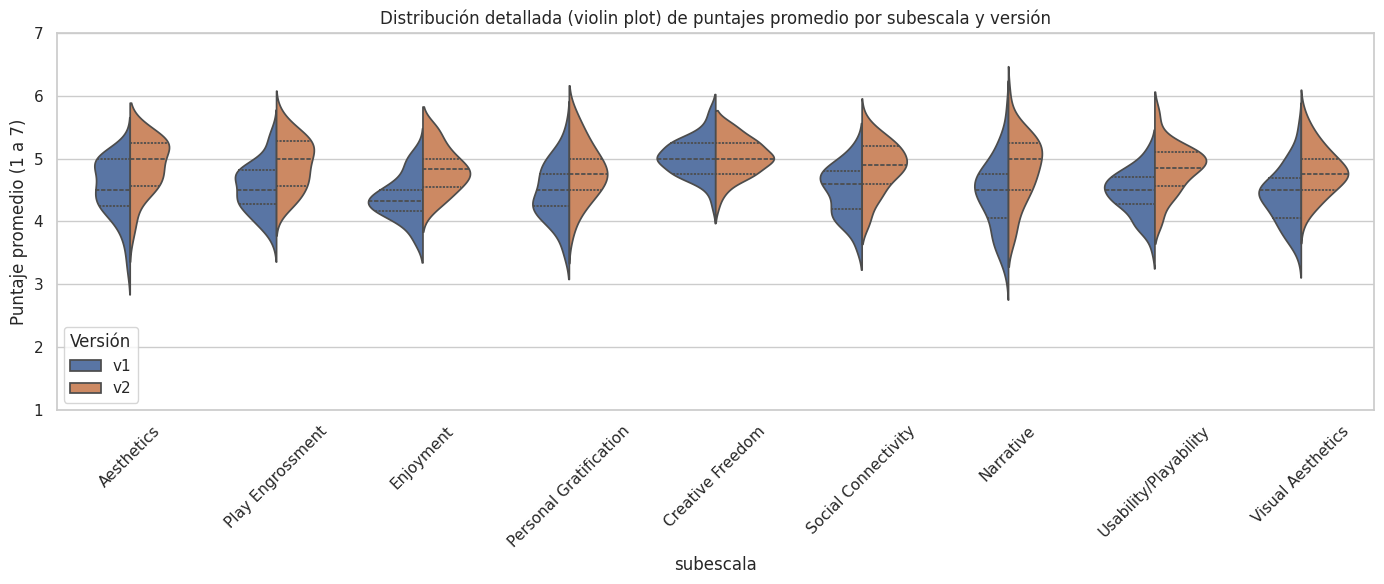

In [31]:
#Violin

plt.figure(figsize=(14, 6))
sns.violinplot(data=df_promedios_melted,
               x='subescala',
               y='puntaje',
               hue='version',
               split=True,
               inner='quartile')

# Personalización del gráfico
plt.title('Distribución detallada (violin plot) de puntajes promedio por subescala y versión')
plt.xticks(rotation=45)
plt.ylim(1, 7)
plt.ylabel('Puntaje promedio (1 a 7)')
plt.legend(title='Versión')
plt.tight_layout()
plt.show()

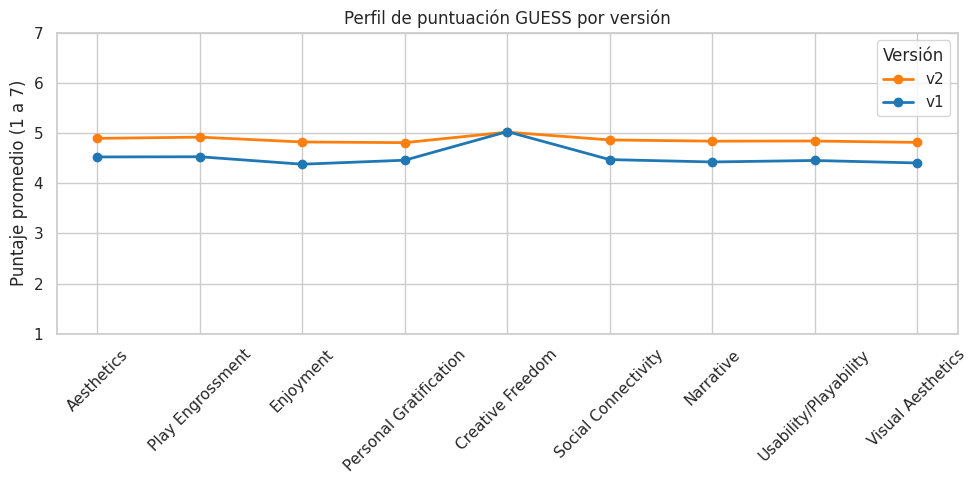

In [32]:
#Gafico de Lineas

colores = {'v1': '#1f77b4',  # azul
           'v2': '#ff7f0e'}  # naranjo
# Gráfico de perfil de puntuación por versión
plt.figure(figsize=(10, 5))

# Dibujar cada línea con color correspondiente
for i, row in mean_scores.iterrows():
    version = row['version']
    plt.plot(mean_scores.columns[1:], row[1:], marker='o',
             label=version, color=colores[version], linewidth=2)

# Personalización
plt.title('Perfil de puntuación GUESS por versión')
plt.ylabel('Puntaje promedio (1 a 7)')
plt.ylim(1, 7)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Versión')
plt.tight_layout()
plt.show()

In [33]:
from scipy.stats import ttest_rel
import pandas as pd

# Separar versiones y ordenar por usuario
v1 = df_sub[df_sub['version'] == 'v1'].sort_values('user_id')
v2 = df_sub[df_sub['version'] == 'v2'].sort_values('user_id')

# Aplicar t-test por subescala (desde la columna 3 en adelante)
resultados = []

for subescala in df_sub.columns[2:]:
    if subescala != 'promedio_general':  # ignorar si ya existe esta columna
        datos_v1 = v1[subescala].values
        datos_v2 = v2[subescala].values

        t_stat, p_val = ttest_rel(datos_v1, datos_v2)
        resultados.append({
            'Subescala': subescala,
            'Media_v1': datos_v1.mean(),
            'Media_v2': datos_v2.mean(),
            't': t_stat,
            'p': p_val,
            'Significativo': p_val < 0.05
        })

# Crear DataFrame de resultados
df_ttest = pd.DataFrame(resultados)

# Renombrar columnas para presentación
df_ttest_renombrado = df_ttest.rename(columns={
    'p': 'p-value',
    't': 't-statistic'
})

# Mostrar tabla con formato y color en la columna "Significativo"
df_ttest_renombrado.style \
    .format({
        'p-value': '{:.2e}',        # notación científica
        't-statistic': '{:.3f}',    # 3 decimales
        'Media_v1': '{:.2f}',       # 2 decimales
        'Media_v2': '{:.2f}'
    }) \
    .map(lambda val: 'color: green; font-weight: bold' if val else 'color: red; font-weight: bold',
         subset='Significativo')


,Subescala,Media_v1,Media_v2,t-statistic,p-value,Significativo
0,Aesthetics,4.53,4.89,-11.240,3.61e-15,True
1,Play Engrossment,4.53,4.92,-16.493,1.23e-21,True
2,Enjoyment,4.38,4.82,-14.433,2.83e-19,True
3,Personal Gratification,4.46,4.81,-9.430,1.36e-12,True
4,Creative Freedom,5.03,5.02,0.573,5.69e-01,False
5,Social Connectivity,4.47,4.86,-13.212,9.04e-18,True
6,Narrative,4.42,4.84,-11.957,3.86e-16,True
7,Usability/Playability,4.45,4.84,-13.458,4.43e-18,True
8,Visual Aesthetics,4.41,4.82,-12.598,5.53e-17,True


In [34]:
# Calcular el promedio general por usuario (de todas las subescalas)
df_sub['promedio_general'] = df_sub.iloc[:, 2:-1].mean(axis=1)  # evita la columna que ya tenga 'promedio_general'

# Separar por versión
v1 = df_sub[df_sub['version'] == 'v1'].sort_values('user_id')
v2 = df_sub[df_sub['version'] == 'v2'].sort_values('user_id')

# Promedios generales por usuario
datos_v1 = v1['promedio_general'].values
datos_v2 = v2['promedio_general'].values

# Aplicar t-test de muestras pareadas
t_stat, p_val = ttest_rel(datos_v1, datos_v2)

# Crear DataFrame con el resultado
df_promedio_general = pd.DataFrame([{
    'Subescala': 'Promedio General',
    'Media_v1': datos_v1.mean(),
    'Media_v2': datos_v2.mean(),
    't': t_stat,
    'p': p_val,
    'Significativo': p_val < 0.05
}])

df_ttest_renombrado = df_promedio_general.rename(columns={
    'p': 'p-value',
    't': 't-statistic'
})
df_ttest_renombrado.style \
    .format({
        'p-value': '{:.2e}',
        't-statistic': '{:.3f}',
        'Media_v1': '{:.2f}',
        'Media_v2': '{:.2f}'
    }) \
    .map(lambda val: 'color: green; font-weight: bold' if val else 'color: red; font-weight: bold',
         subset='Significativo')

# Mostrar tabla



,Subescala,Media_v1,Media_v2,t-statistic,p-value,Significativo
0,Promedio General,4.53,4.88,-30.520,1.53e-33,True


In [35]:
# Calcular desviación estándar (DE) por subescala para v1
std_v1 = v1.iloc[:, 2:].std()

# Calcular desviación estándar (DE) por subescala para v2
std_v2 = v2.iloc[:, 2:].std()

# Unirlas en un nuevo DataFrame
df_std = pd.DataFrame({
    'Subescala': std_v1.index,
    'DE_v1': std_v1.values,
    'DE_v2': std_v2.values
})

df_std

,Subescala,DE_v1,DE_v2
0,Aesthetics,0.446786,0.425854
1,Play Engrossment,0.384248,0.400083
2,Enjoyment,0.346737,0.358584
3,Personal Gratification,0.452769,0.453332
4,Creative Freedom,0.301527,0.293814
5,Social Connectivity,0.399510,0.390583
6,Narrative,0.537497,0.511999
7,Usability/Playability,0.347167,0.383163
8,Visual Aesthetics,0.425255,0.377323
9,promedio_general,0.152824,0.157861
